In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df_grades = pd.read_csv('D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\EDA\student_grades_eda.csv')
df_grades.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_15800\3607977960.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_grades = pd.read_csv('D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\EDA\student_grades_eda.csv')


,student_ID,first_name,last_name,faculty,tuition,OH_participated,classes_skipped,grade_avg
0,20123456,John,Park,Arts,44191,0,5,B
1,20123457,Alex,Great,Science,32245,4,10,B
2,20123458,Sebastian,Taylor,Business,42679,6,7,B
3,20123459,Michael,Bay,Math,46478,15,2,A
4,20123460,Scott,Foster,Engineering,36784,5,8,A


In [3]:
print(len(df_grades['classes_skipped']))

30


In [4]:
df_grades['classes_skipped'].describe()

count    30.000000
mean      4.733333
std       3.027840
min       0.000000
25%       2.250000
50%       4.000000
75%       7.000000
max      10.000000
Name: classes_skipped, dtype: float64

In [5]:
# Manually get a statistic of interest
print("Mean: ", df_grades['tuition'].mean())
print("Quartile: ", df_grades['tuition'].quantile())
print("Standard Deviation: ", df_grades['tuition'].std())
print("Variance: ", df_grades['tuition'].var())

Mean:  40307.066666666666
Quartile:  40905.0
Standard Deviation:  5792.681196447648
Variance:  33555155.44367816


### Using Seaborn

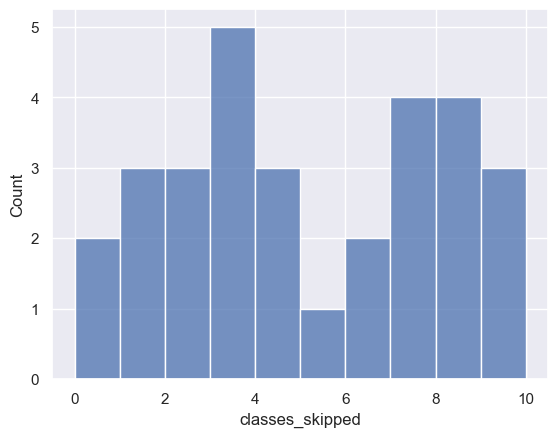

In [6]:
histplot = sns.histplot(data = df_grades, x = 'classes_skipped', binwidth = 1)

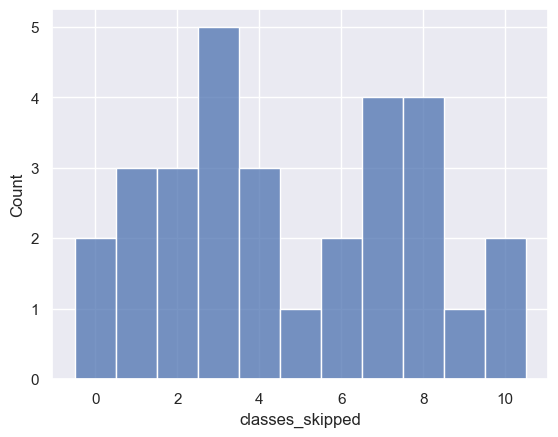

In [7]:
# Plot a bar plot that have exactly one bar per integer
histplot = sns.histplot(data = df_grades, x = 'classes_skipped', discrete = True)

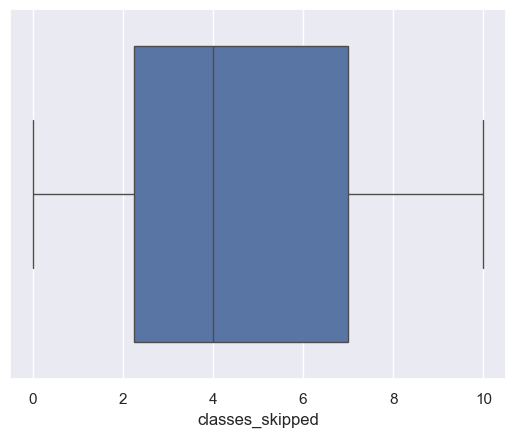

In [8]:
# Outliers can be found through box plots with the help of IQR Rule that is used by default
boxplot = sns.boxplot(data = df_grades, x = 'classes_skipped', orient='h')
# No outliers here

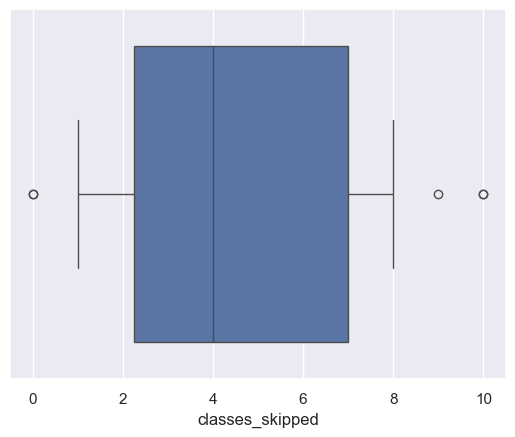

In [9]:
# We can modify the wiskers range by ourselves
boxplot = sns.boxplot(data = df_grades, x = 'classes_skipped', whis = 0.3)

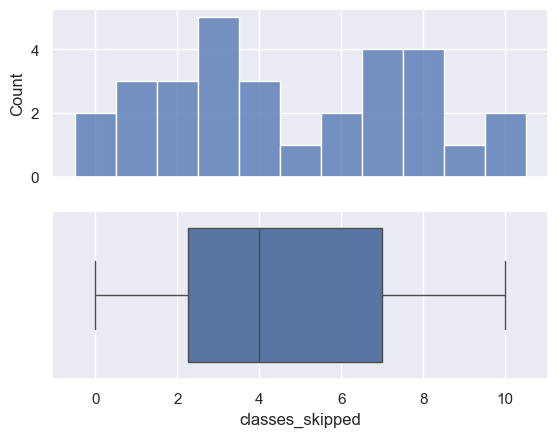

In [10]:
# We can plot a histogram and a box plot together and make them share the same axis
fig, (hist, box) = plt.subplots(2, 1,sharex=True)
histplot = sns.histplot(data = df_grades, x ='classes_skipped', discrete = True, ax = hist)
boxplot = sns.boxplot(data = df_grades, x = 'classes_skipped', orient='h', ax = box)

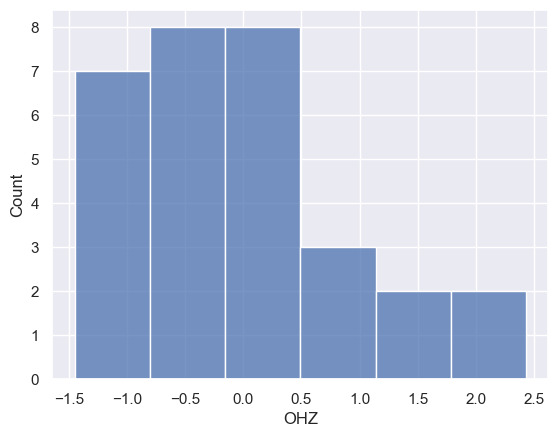

In [11]:
# Plot the Z scores of the values of the column
mean = df_grades['OH_participated'].mean()
std = df_grades['OH_participated'].std()
df_grades['OHZ'] = (df_grades['OH_participated'] - mean )/ std
histplot = sns.histplot(data = df_grades, x ='OHZ')

# Basic Plot for Categorical Features

In [12]:
faculty_counts = df_grades['faculty'].value_counts().index
print(faculty_counts)

Index(['Business', 'Engineering', 'Arts', 'Science', 'Math'], dtype='object', name='faculty')


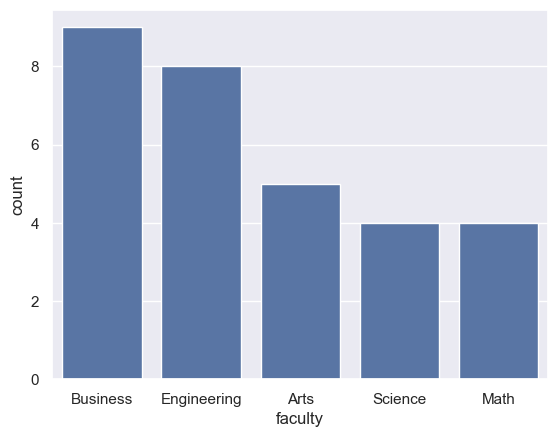

In [13]:
countplot = sns.countplot(data = df_grades, x = 'faculty', order = faculty_counts)

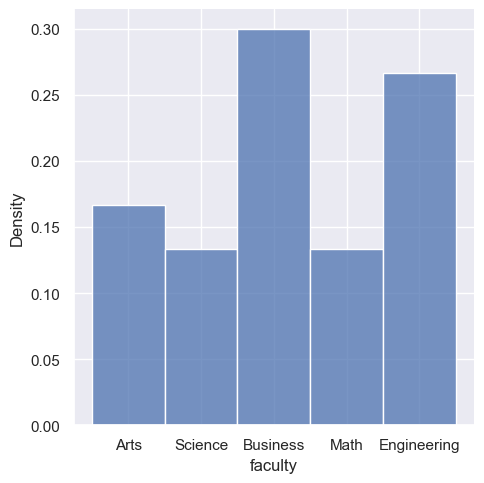

In [14]:
# Plot the percentage of observations in each category and order by frequency
displot = sns.displot(data = df_grades, x ='faculty', stat="density" )

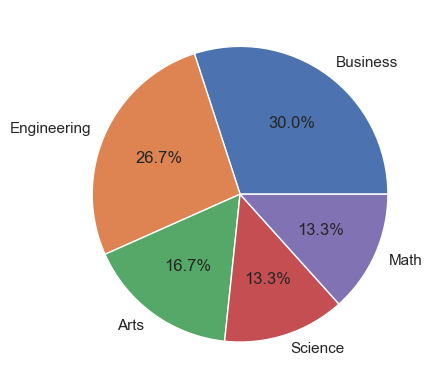

In [15]:
# We can use pie charts to show the percentage of observations in each category
pie_data = df_grades['faculty'].value_counts()
plt.pie(pie_data.values, labels = pie_data.index, autopct="%.1f%%")
plt.show()

## Exercise

In [16]:
df_cars = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\EDA\indian_cars_dataset.csv")
df_cars.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_15800\3190173707.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_cars = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\EDA\indian_cars_dataset.csv")


,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type,car_name
0,583000,399000,51,89.0,3500,65.71,5500,27.0,3,4.5,5.0,Petrol,998,Automatic,Hatchback,Maruti Alto K10
1,1396000,799000,86,136.8,4400,101.65,6000,48.0,4,4.5,5.0,Petrol,1462,Automatic,SUV,Maruti Brezza
2,1603000,1353000,242,300.0,2800,130.00,3750,57.0,4,4.5,4.0,Diesel,2184,Automatic,SUV,Mahindra Thar
3,2458000,1318000,313,450.0,2800,182.38,3500,60.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra XUV700
4,2390000,1199000,107,400.0,2750,172.45,3500,57.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra Scorpio-N


In [17]:
df_cars[df_cars['body_type'] ==  "SUV"]['transmission_type'].value_counts()

transmission_type
Automatic    76
Manual        9
Name: count, dtype: int64

In [18]:
df_cars[df_cars['body_type'] ==  "SUV"]

,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type,car_name
1,1396000,799000,86,136.8,4400,101.65,6000,48.0,4,4.5,5.0,Petrol,1462,Automatic,SUV,Maruti Brezza
2,1603000,1353000,242,300.0,2800,130.00,3750,57.0,4,4.5,4.0,Diesel,2184,Automatic,SUV,Mahindra Thar
3,2458000,1318000,313,450.0,2800,182.38,3500,60.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra XUV700
4,2390000,1199000,107,400.0,2750,172.45,3500,57.0,4,4.5,7.0,Diesel,2198,Automatic,SUV,Mahindra Scorpio-N
5,4957000,3240000,99,500.0,2800,201.15,3400,80.0,4,4.5,7.0,Diesel,2755,Automatic,SUV,Toyota Fortuner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,397000,391000,6,850.0,4500,631.62,6000,0.0,8,3.5,4.0,Petrol,3996,Automatic,SUV,Porsche Cayenne Coupe
196,5690000,5450000,1,350.0,2500,170.00,3750,60.0,4,4.5,5.0,Diesel,1998,Automatic,SUV,Compass Trailhawk
197,2075000,1615000,78,350.0,2500,167.67,3750,60.0,4,4.5,7.0,Diesel,1956,Automatic,SUV,Jeep Meridian
200,2075000,1615000,2,350.0,2500,167.67,3750,60.0,4,4.5,7.0,Diesel,1956,Manual,SUV,MG Hector Plus


In [19]:
df_cars[df_cars['body_type'] ==  "SUV"]['transmission_type']

1      Automatic
2      Automatic
3      Automatic
4      Automatic
5      Automatic
         ...    
194    Automatic
196    Automatic
197    Automatic
200       Manual
201    Automatic
Name: transmission_type, Length: 85, dtype: object

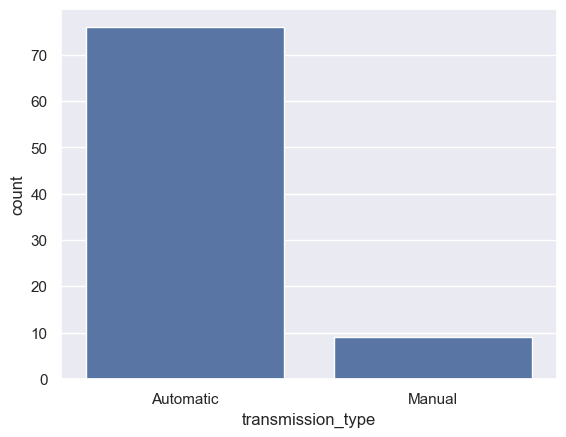

In [20]:
SUV_index = df_cars[df_cars['body_type'] ==  "SUV"]['transmission_type'].value_counts().index
data = df_cars[df_cars['body_type'] == "SUV"]['transmission_type']
countplot = sns.countplot(x = data, order = SUV_index)

## Exercise 2(Advanced) - Visuals for Numeric Features

In [21]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ending_price         203 non-null    int64  
 1   starting_price       203 non-null    int64  
 2   reviews_count        203 non-null    int64  
 3   max_torque_nm        203 non-null    float64
 4   max_torque_rpm       203 non-null    int64  
 5   max_power_bhp        203 non-null    float64
 6   max_power_rp         203 non-null    int64  
 7   fuel_tank_capacity   203 non-null    float64
 8   no_cylinder          203 non-null    int64  
 9   rating               203 non-null    float64
 10  seating_capacity     202 non-null    float64
 11  fuel_type            203 non-null    object 
 12  engine_displacement  203 non-null    int64  
 13  transmission_type    203 non-null    object 
 14  body_type            203 non-null    object 
 15  car_name             203 non-null    obj

In [22]:
df_cars.describe()

,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,engine_displacement
count,2.030000e+02,2.030000e+02,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,202.000000,203.000000
mean,1.112005e+07,9.443640e+06,118.684729,402.804828,3346.507389,266.576995,4790.147783,46.143842,4.709360,4.433498,5.014851,2305.921182
std,1.551746e+07,1.357035e+07,314.331318,237.116638,1594.960077,193.474807,1990.876835,28.904207,2.538664,0.280136,1.161050,1493.837786
min,3.610000e+05,3.390000e+05,1.000000,16.100000,0.000000,10.800000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,1.407500e+06,9.455000e+05,5.000000,201.000000,2500.000000,108.555000,3800.000000,33.500000,4.000000,4.500000,5.000000,1339.500000
50%,4.600000e+06,4.312000e+06,14.000000,360.000000,3500.000000,187.740000,5500.000000,50.000000,4.000000,4.500000,5.000000,1991.000000
75%,1.575000e+07,1.160000e+07,83.000000,590.000000,4500.000000,384.870000,6000.000000,66.000000,6.000000,4.500000,5.000000,2996.000000
max,9.000000e+07,7.060000e+07,2392.000000,1020.000000,7000.000000,788.520000,8500.000000,100.000000,12.000000,5.000000,8.000000,6750.000000


In [23]:
avearge_all_cars = df_cars['starting_price'].mean()
sedan_condition = df_cars['body_type'] == 'Sedan'
condition = (df_cars['starting_price'] < avearge_all_cars) & (sedan_condition)
condition

0      False
1      False
2      False
3      False
4      False
       ...  
198    False
199     True
200    False
201    False
202    False
Length: 203, dtype: bool

In [24]:
df_cars_sedan = df_cars[condition]
df_cars_sedan.head()

,ending_price,starting_price,reviews_count,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,fuel_tank_capacity,no_cylinder,rating,seating_capacity,fuel_type,engine_displacement,transmission_type,body_type,car_name
19,918000,624000,245,113.0,4400,88.50,6000,37.0,4,4.5,5.0,Petrol,1197,Automatic,Sedan,Maruti Dzire
20,1000000,950000,1067,145.0,4600,117.60,6600,40.0,4,4.5,5.0,Petrol,1497,Manual,Sedan,Honda City 4th Generation
28,1545000,941000,234,250.0,2750,113.45,4000,45.0,4,4.5,5.0,Diesel,1493,Automatic,Sedan,Hyundai Verna
30,1552000,1157000,162,200.0,1750,97.89,3600,40.0,4,4.5,5.0,Diesel,1498,Manual,Sedan,Honda City
37,859000,600000,136,95.0,3500,72.40,6000,60.0,3,4.5,5.0,CNG,1199,Manual,Sedan,Tata Tigor


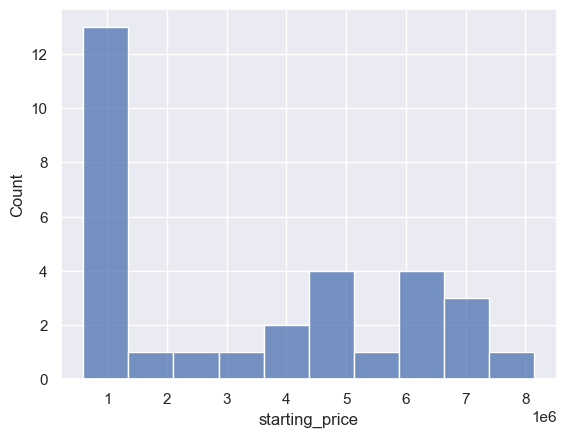

In [25]:
histplot = sns.histplot(data = df_cars_sedan, x = 'starting_price', bins = 10)

In [28]:
df = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\EDA\phone_marketplace_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_15800\679377911.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\EDA\phone_marketplace_dataset.csv")


,price,year_made,name,battery_life_percentage,storage,magnet_charging,marketplace,years_owned,visible_scratches,pro,original_sale_price,#_of_previous_owners,megapixel
0,551,2019,iPhone_11,74,64,no,kijiji,2,9,no,747,1,12
1,822,2020,iPhone_12,94,128,yes,craigslist,2,6,no,888,1,16
2,1008,2022,iPhone_13,97,256,yes,craigslist,0,2,no,1185,1,22
3,881,2021,iPhone_14,90,128,yes,craigslist,2,2,no,887,1,20
4,839,2020,iPhone_12,91,256,yes,kijiji,1,5,no,969,1,16


# Multivariate Variables

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   price                    349 non-null    int64 
 1   year_made                349 non-null    int64 
 2   name                     349 non-null    object
 3   battery_life_percentage  349 non-null    int64 
 4   storage                  349 non-null    int64 
 5   magnet_charging          349 non-null    object
 6   marketplace              349 non-null    object
 7   years_owned              349 non-null    int64 
 8   visible_scratches        349 non-null    int64 
 9   pro                      349 non-null    object
 10  original_sale_price      349 non-null    int64 
 11  #_of_previous_owners     349 non-null    int64 
 12  megapixel                349 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 35.6+ KB


In [32]:
# Correrlation between variables
df.describe()

,price,year_made,battery_life_percentage,storage,years_owned,visible_scratches,original_sale_price,#_of_previous_owners,megapixel
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,881.057307,2020.515759,88.607450,148.171920,1.495702,3.002865,965.103152,1.214900,17.524355
std,305.372445,1.141137,7.550067,79.229727,1.242499,2.566919,277.363067,0.599047,3.899986
min,402.000000,2019.000000,70.000000,64.000000,0.000000,0.000000,408.000000,1.000000,12.000000
25%,599.000000,2019.000000,84.000000,64.000000,0.000000,1.000000,745.000000,1.000000,12.000000
50%,858.000000,2021.000000,91.000000,128.000000,1.000000,2.000000,923.000000,1.000000,20.000000
75%,1124.000000,2022.000000,94.000000,256.000000,2.000000,5.000000,1200.000000,1.000000,22.000000
max,1499.000000,2022.000000,100.000000,256.000000,4.000000,10.000000,1499.000000,4.000000,22.000000


In [37]:
df['name'] = df['name'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   price                    349 non-null    int64 
 1   year_made                349 non-null    int64 
 2   name                     349 non-null    object
 3   battery_life_percentage  349 non-null    int64 
 4   storage                  349 non-null    int64 
 5   magnet_charging          349 non-null    object
 6   marketplace              349 non-null    object
 7   years_owned              349 non-null    int64 
 8   visible_scratches        349 non-null    int64 
 9   pro                      349 non-null    object
 10  original_sale_price      349 non-null    int64 
 11  #_of_previous_owners     349 non-null    int64 
 12  megapixel                349 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 35.6+ KB


In [40]:
# plt.rcParams['figure.figsize'] = [10, 7]
# heatmap = sns.heatmap(df.corr(), annot = True)

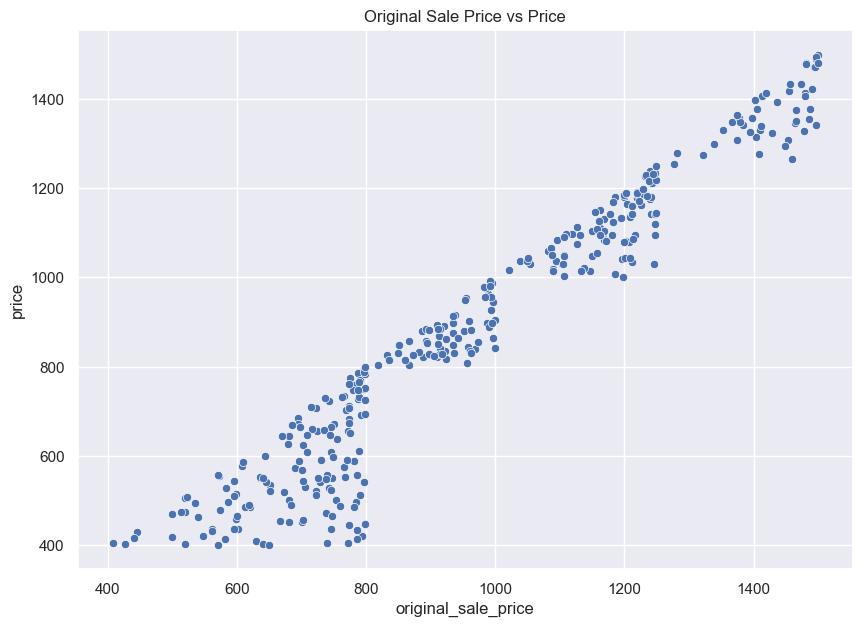

In [46]:
# Scatter plot to visualize the relationships
ax  = sns.scatterplot(data = df, x = 'original_sale_price', y = 'price')
ax.set(title = 'Original Sale Price vs Price')
plt.show()

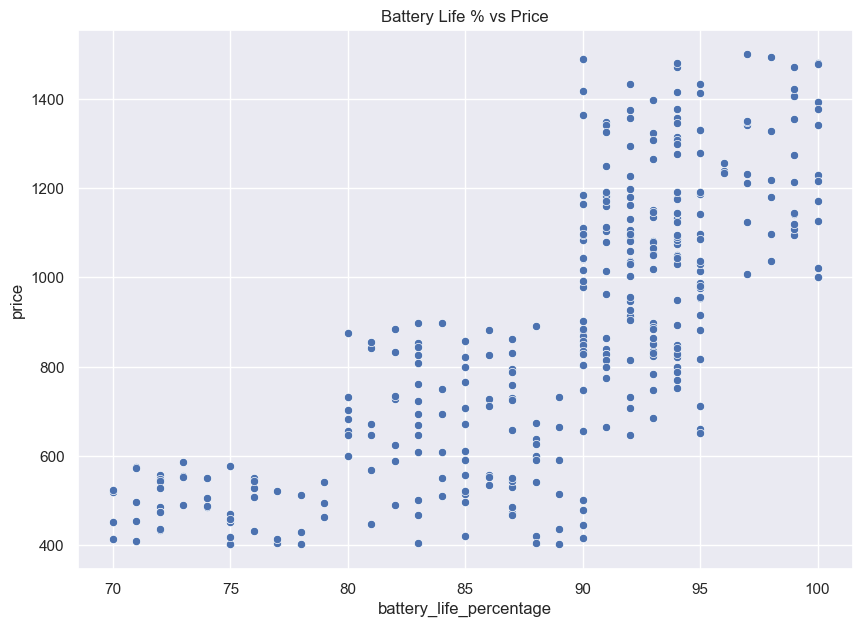

In [47]:
ax1 = sns.scatterplot(data = df, x = "battery_life_percentage", y = 'price')
ax1.set(title = 'Battery Life % vs Price')
plt.show()

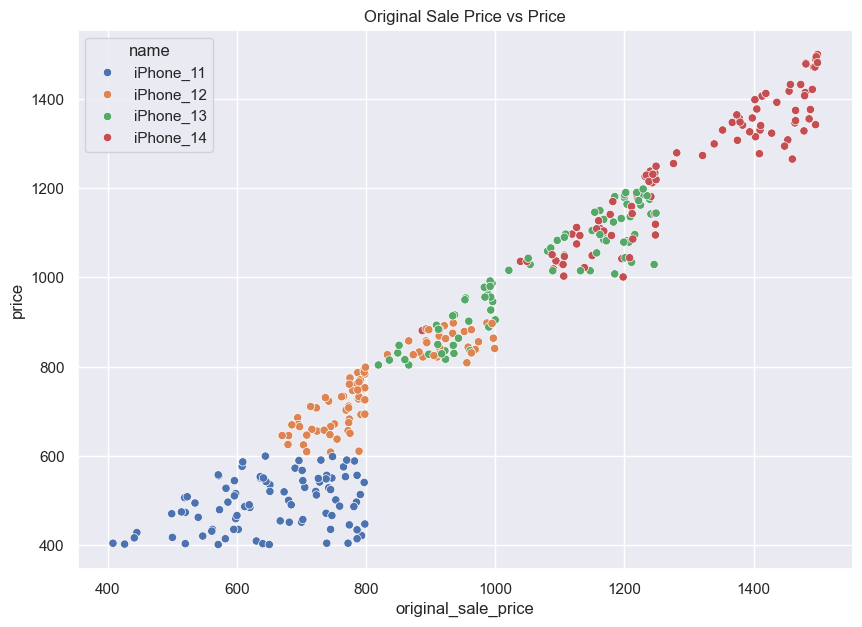

In [48]:
ax  = sns.scatterplot(data = df, x = 'original_sale_price', y = 'price', hue = 'name')
ax.set(title = 'Original Sale Price vs Price')
plt.show()

c:\Users\Musawer Afzal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\Musawer Afzal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
c:\Users\Musawer Afzal\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


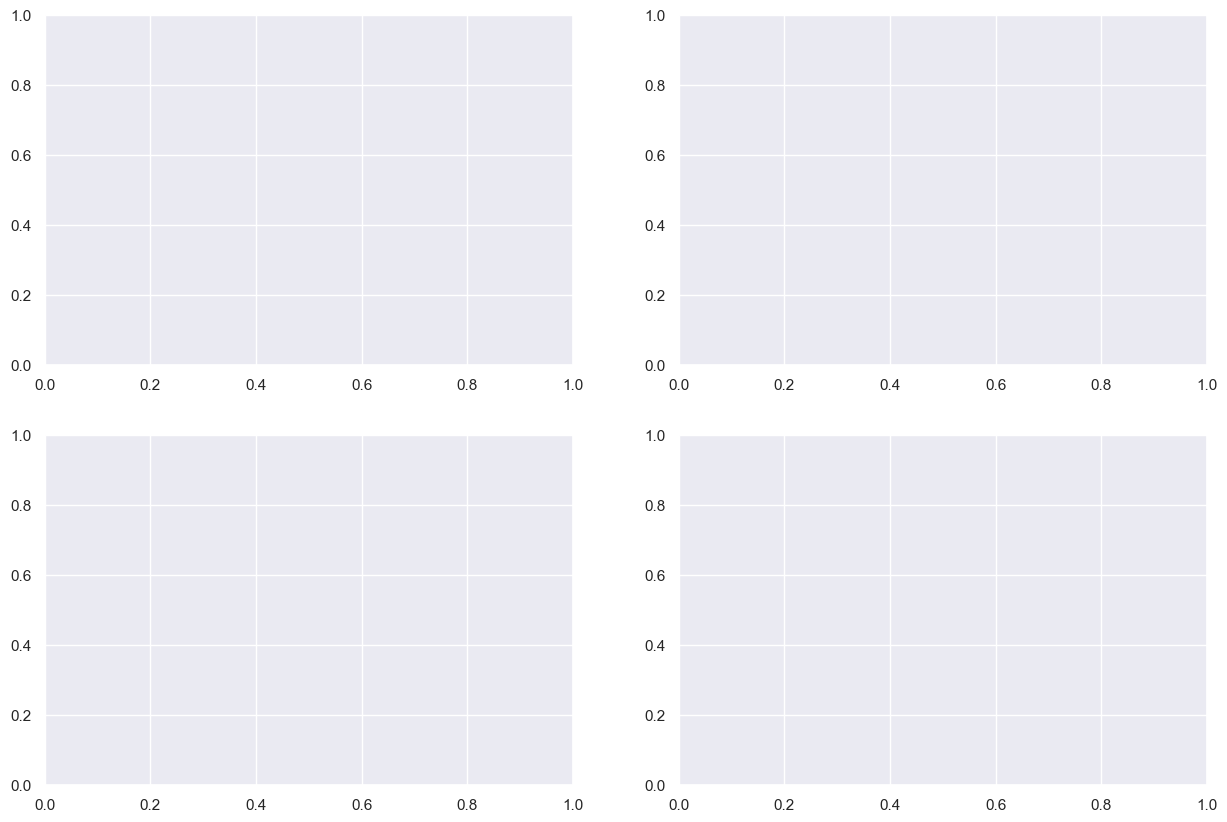

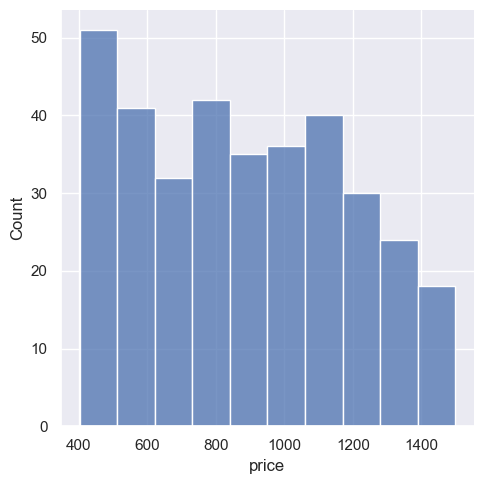

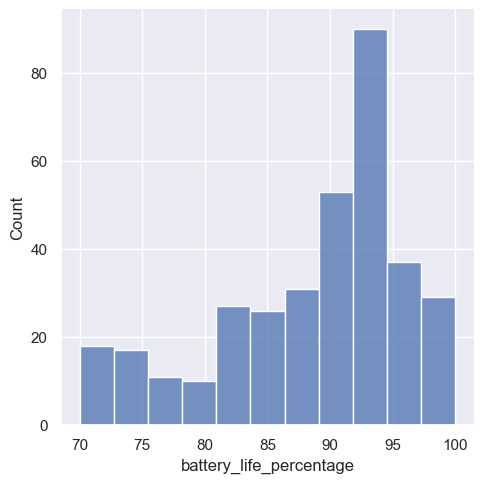

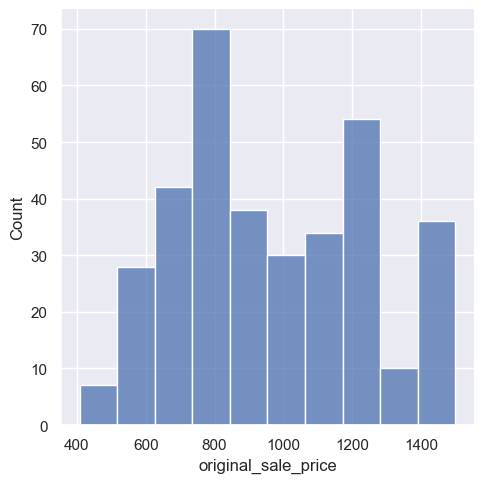

In [55]:
# figure out a way to make it in one line not two

fig, axes = plt.subplots(2,2, figsize = [15, 10])

sns.displot(df['price'], ax = axes[0,0])
sns.displot(df['battery_life_percentage'], ax = axes[0,1])
sns.displot(df['original_sale_price'], ax = axes[1,0])

# Categorical VS Contiuous variable analysis

In [51]:
df.groupby('name')['price'].describe().reset_index()

,name,count,mean,std,min,25%,50%,75%,max
0,iPhone_11,89.0,495.213483,58.711829,402.0,446.00,497.0,545.00,600.0
1,iPhone_12,85.0,759.329412,85.997424,609.0,683.00,753.0,833.00,898.0
2,iPhone_13,81.0,1013.135802,124.003906,804.0,905.00,1029.0,1124.00,1198.0
3,iPhone_14,94.0,1242.638298,149.731146,881.0,1109.25,1252.0,1355.75,1499.0


In [52]:
df.groupby('marketplace')['price'].describe().reset_index()

,marketplace,count,mean,std,min,25%,50%,75%,max
0,craigslist,113.0,908.371681,288.975907,402.0,666.00,885.0,1124.00,1478.0
1,facebook,128.0,862.390625,302.255334,404.0,597.75,828.0,1106.75,1489.0
2,kijiji,108.0,874.601852,325.879226,402.0,553.25,922.0,1133.00,1499.0


<Axes: xlabel='name', ylabel='price'>

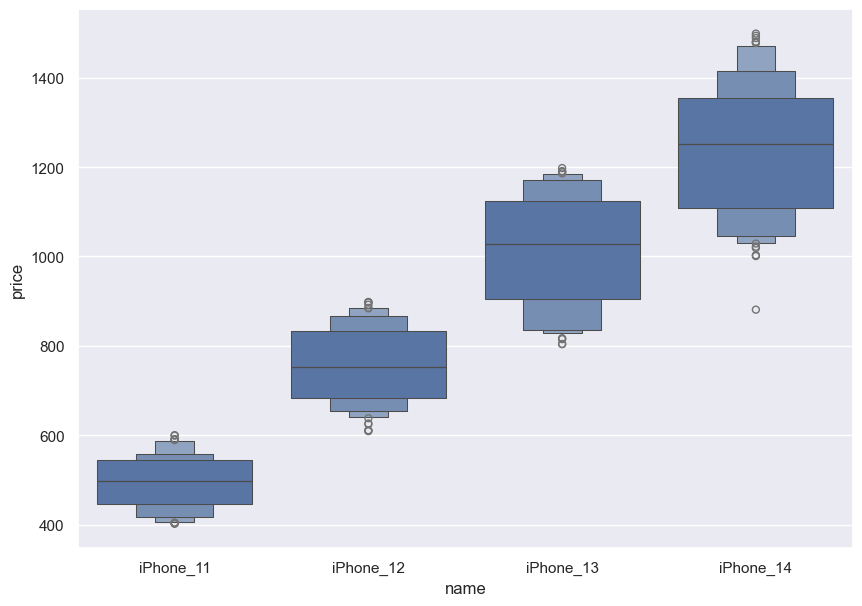

In [ ]:
sns.boxenplot(data = df, x = 'name', y = 'price')

<Axes: xlabel='marketplace', ylabel='price'>

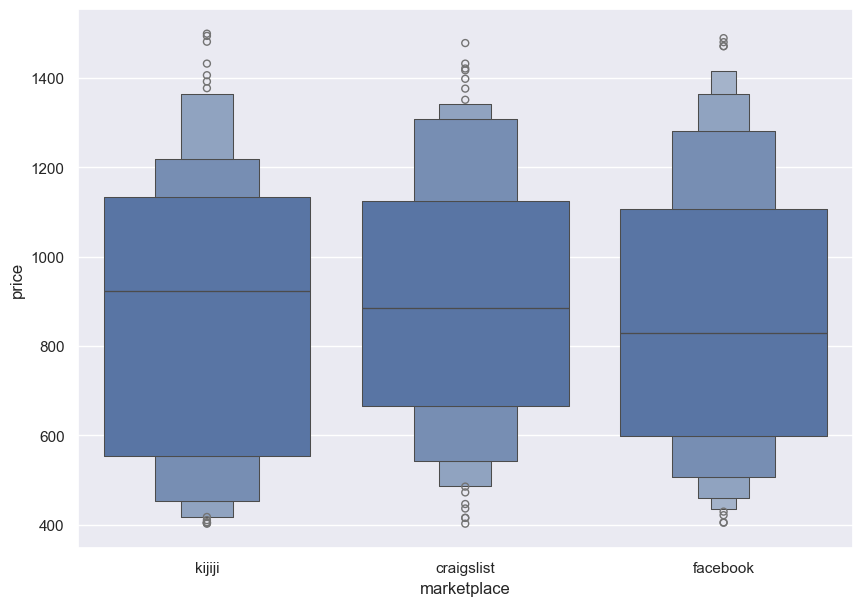

In [54]:
sns.boxenplot(data = df, x = 'marketplace', y = 'price')

# Excercise 1(indian cars dataset)

In [56]:
# Create descriptive statistics for starting and ending price
# Create a scatter plot to illustrate the reltationship between starting and ending price
# What differences can you observe?

In [59]:
df_cars[['ending_price', 'starting_price']].describe().applymap('{:,.0f}'.format)

C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_15800\2039862423.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cars[['ending_price', 'starting_price']].describe().applymap('{:,.0f}'.format)


,ending_price,starting_price
count,203,203
mean,"11,120,054","9,443,640"
std,"15,517,463","13,570,354"
min,"361,000","339,000"
25%,"1,407,500","945,500"
50%,"4,600,000","4,312,000"
75%,"15,750,000","11,600,000"
max,"90,000,000","70,600,000"


<Axes: xlabel='starting_price', ylabel='ending_price'>

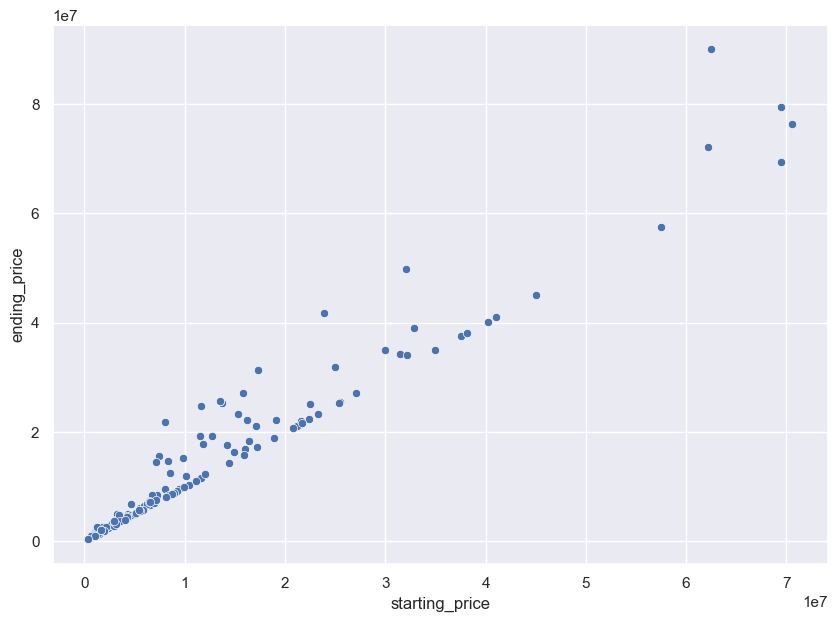

In [60]:
sns.scatterplot(data = df_cars, x = 'starting_price', y = 'ending_price')

# Exercise 2 - Creating plots to find the relationships between categorical and categorical data

[Text(0.5, 1.0, 'Fuel Type vs Starting Price')]

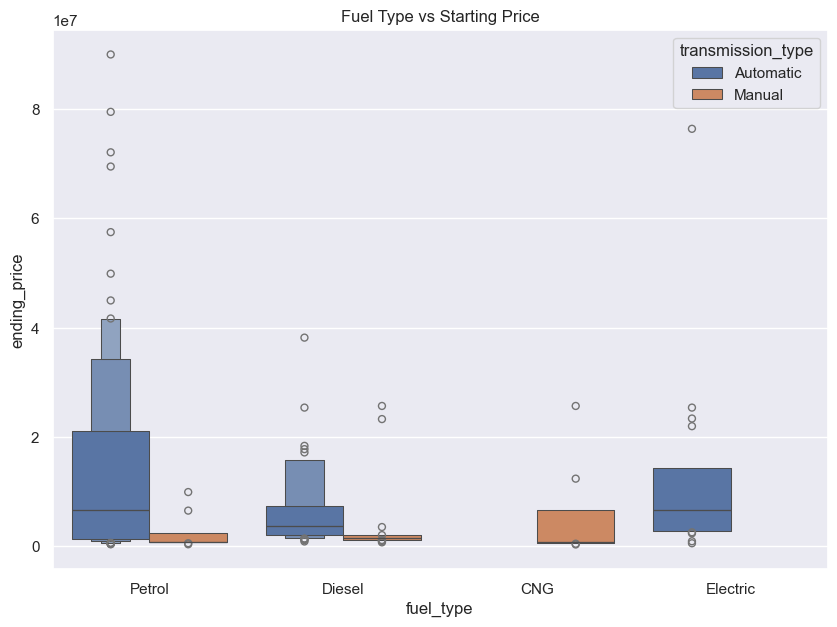

In [62]:
sns.boxenplot(data = df_cars, x = 'fuel_type', y = 'ending_price', hue = 'transmission_type').set(title = 'Fuel Type vs Starting Price')